In [2]:
import pandas as pd 
from pycaret.regression import *
from pycaret.regression import RegressionExperiment

In [35]:
data = pd.read_csv('score_low_systolic.csv', sep=',')

In [36]:
score = data['score']
max = round(score.max(), 2)
min = round(score.min(), 2)
mean = round(score.mean(), 2)
gt_mean = score[score > mean].count()
lt_mean = score[score < mean].count()
print(f"Max: {max}")
print(f"Min: {min}")
print(f"Media: {mean}")
print(f"Mas que la media: {gt_mean}")
print(f"Menos que la media: {lt_mean}")

Max: 188.37
Min: 1.0
Media: 1.87
Mas que la media: 1666
Menos que la media: 8330


In [29]:
s = RegressionExperiment()
s.setup(data, target = 'score', session_id = 10)

,Description,Value
0,Session id,10
1,Target,score
2,Target type,Regression
3,Original data shape,"(10000, 38)"
4,Transformed data shape,"(10000, 38)"
5,Transformed train set shape,"(7000, 38)"
6,Transformed test set shape,"(3000, 38)"
7,Numeric features,37
8,Preprocess,True
9,Imputation type,simple


In [30]:
best = s.compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:00:36
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.1450,2.8715,1.1249,0.9351,0.0532,0.0298,3.2460
et,Extra Trees Regressor,0.1962,4.6686,1.4480,0.8940,0.0617,0.0257,0.6460
rf,Random Forest Regressor,0.2502,5.8826,1.9606,0.7881,0.0904,0.0379,0.5910
lightgbm,Light Gradient Boosting Machine,0.3703,6.6036,2.0770,0.7680,0.1672,0.1470,0.1700
dt,Decision Tree Regressor,0.3098,5.8853,2.0373,0.7671,0.0999,0.0405,0.0260
gbr,Gradient Boosting Regressor,0.5287,10.3061,2.8598,0.4791,0.2023,0.1913,0.5630
br,Bayesian Ridge,1.3893,16.6174,3.5980,0.2650,0.4263,0.8738,0.0240
ridge,Ridge Regression,1.4027,16.6281,3.6014,0.2628,0.4277,0.8822,0.0200
lar,Least Angle Regression,1.4033,16.6286,3.6015,0.2627,0.4277,0.8826,0.0230
lr,Linear Regression,1.4033,16.6286,3.6015,0.2627,0.4277,0.8826,0.7380


In [13]:
print(best)

LinearRegression(n_jobs=-1)


In [21]:
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

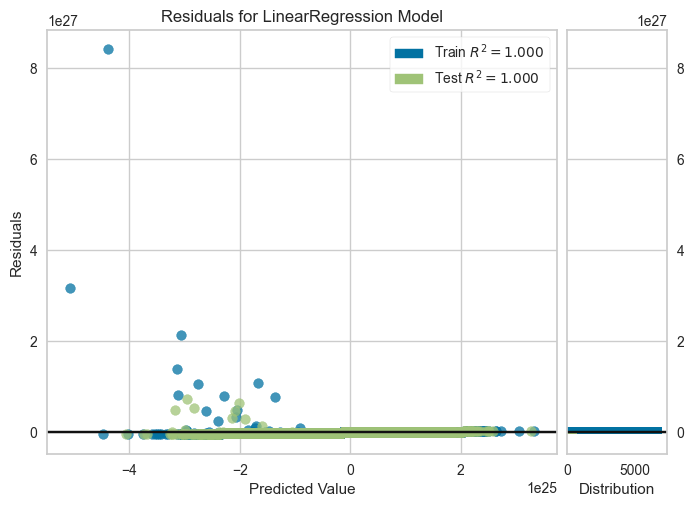

In [15]:
s.plot_model(best, plot = 'residuals')

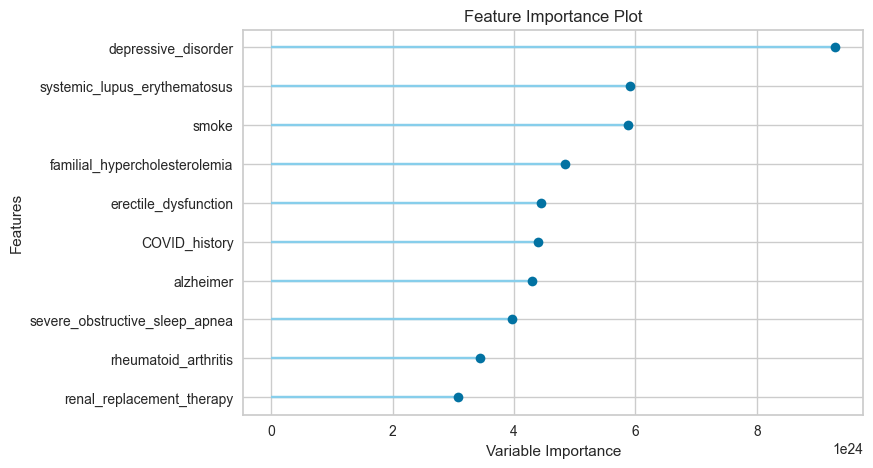

In [16]:
s.plot_model(best, plot = 'feature')

In [17]:
s.predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,9972185194092473763233792.0000,755105869990742266732500911363784852121600141557760.0000,27479189762268140914343936.0000,1.0000,56.5467,29163972089625616521654749555503052881920.0000


,age,gender,ethnic,poverty,smoke,ascvd,icm,mellitus_diabetis,hypertension,dyslipidemia,...,severe_obstructive_sleep_apnea,fatty_liver,erectile_dysfunction,rheumatoid_arthritis,migraines,systemic_lupus_erythematosus,alzheimer,systolic_blood_pressure,score,prediction_label
937,7417,1,0,0,0,0,24.190001,0,1,1,...,0,0,0,0,0,0,0,120,-2.484896e+24,-1.926560e+25
9355,7685,1,0,0,1,0,26.590000,0,0,0,...,0,0,0,0,0,0,0,160,-1.776357e-15,-3.231019e+25
2293,26786,0,0,0,0,0,27.180000,0,1,0,...,0,0,0,0,0,0,0,77,2.220446e-16,1.141578e+25
192,14145,1,0,0,1,0,25.760000,0,0,1,...,0,0,0,0,0,0,0,128,-2.220446e-16,-8.428133e+24
8675,16934,0,0,0,0,0,24.730000,0,1,0,...,0,1,0,0,0,0,0,98,0.000000e+00,-9.183135e+24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4964,25038,1,0,0,0,0,35.689999,0,0,0,...,0,0,0,0,1,0,0,66,0.000000e+00,2.249388e+24
8978,14969,1,0,1,0,0,26.820000,0,0,1,...,0,1,0,1,0,0,0,121,-2.220446e-16,-1.366981e+25
7540,13926,0,0,0,0,0,25.969999,0,1,0,...,0,0,0,0,0,0,0,181,0.000000e+00,-1.030605e+25
5275,17150,1,0,0,0,0,24.540001,0,0,1,...,0,0,0,0,0,0,0,170,2.220446e-16,-1.887279e+24


In [18]:
predictions = s.predict_model(best, data=data)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,11124771616183352685494272.0000,9526708460911897739476228104046178911064966570180608.0000,97604858797663841861763072.0000,1.0000,56.5512,28671697305206913994599991926179336552448.0000


,age,gender,ethnic,poverty,smoke,ascvd,icm,mellitus_diabetis,hypertension,dyslipidemia,...,severe_obstructive_sleep_apnea,fatty_liver,erectile_dysfunction,rheumatoid_arthritis,migraines,systemic_lupus_erythematosus,alzheimer,systolic_blood_pressure,score,prediction_label
0,21464,0,2,0,0,0,34.599998,0,1,1,...,0,0,0,0,0,0,0,60,0.000000e+00,1.598674e+25
1,28977,1,0,0,0,0,19.320000,0,1,1,...,0,1,0,0,0,0,0,174,-2.220446e-16,9.996147e+24
2,19533,0,0,0,0,0,26.959999,0,0,1,...,0,0,0,0,0,0,0,82,0.000000e+00,9.797692e+24
3,26605,1,0,0,0,0,24.030001,0,1,0,...,0,0,0,0,0,0,0,178,2.220446e-16,1.880283e+25
4,28940,0,0,0,1,0,16.940001,0,1,0,...,0,1,0,0,0,0,0,199,0.000000e+00,-1.474431e+24


In [ ]:
s.save_model(best, 'my_best_pipeline')

In [ ]:
loaded_model = s.load_model('my_best_pipeline')
print(loaded_model)